In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import altair as alt

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [201]:
df = pd.read_excel('../data/eurovision_song_contest.xlsx')

In [202]:
# Clean column names

df = df.rename(str.lower, axis='columns')
df = df.rename(columns={'(semi-) final': 'semi_final',
                        'jury or televoting': 'jury_televoting',
                        'from country': 'from_country',
                        'to country': 'to_country',
                        'points      ': 'points'})

In [203]:
# Drop rows where `from_country` and `to_country` are the same
# Only include votes from the jury at the finals

df = df[(df['duplicate'] != 'x') & 
        (df['semi_final'] == 'f') &
        (df['jury_televoting'] == 'J')]
df = df.drop(columns='duplicate')

In [204]:
df.head()

,year,semi_final,edition,jury_televoting,from_country,to_country,points
1,1975,f,1975f,J,Belgium,Finland,0
2,1975,f,1975f,J,Belgium,France,2
3,1975,f,1975f,J,Belgium,Germany,0
4,1975,f,1975f,J,Belgium,Ireland,12
5,1975,f,1975f,J,Belgium,Israel,1


In [205]:
df['to_country_year'] = df['to_country'] + df.year.map(str)

In [206]:
# Check for duplicate entries
df[df.duplicated(['from_country', 'to_country_year'])]

,year,semi_final,edition,jury_televoting,from_country,to_country,points,to_country_year
49831,2019,f,2019f,J,Belarus,Russia,1,Russia2019


In [207]:
df.query("from_country == 'Belarus' and to_country_year == 'Russia2019'")

,year,semi_final,edition,jury_televoting,from_country,to_country,points,to_country_year
49810,2019,f,2019f,J,Belarus,Russia,0,Russia2019
49831,2019,f,2019f,J,Belarus,Russia,1,Russia2019


According to [this scoreboard](https://eurovisionworld.com/eurovision/2019), Belarus gave Russia 1 point that year.

In [208]:
# Keep the correct observation

df = df[~(df['from_country'] == 'Belarus') |
        ~(df['to_country_year'] == 'Russia2019') |
        ~(df['points'] == 0)]

In [209]:
test = df.loc[:, ['from_country', 'points', 'to_country_year']]

In [210]:
test = test.pivot(index='from_country', columns='to_country_year', values='points')
test = test.fillna(1000)

In [214]:
def plot_dendrogram(w,h, method, metric):

    Z = linkage(test, method=method, metric=metric)
    w = 22
    h = 10
    fig, ax = plt.subplots(figsize=(w,h))
    dendrogram(Z, labels = test.index, ax=ax);
    ax = plt.gca()
    ax.set_ylabel("Distance", fontsize=w)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=w)

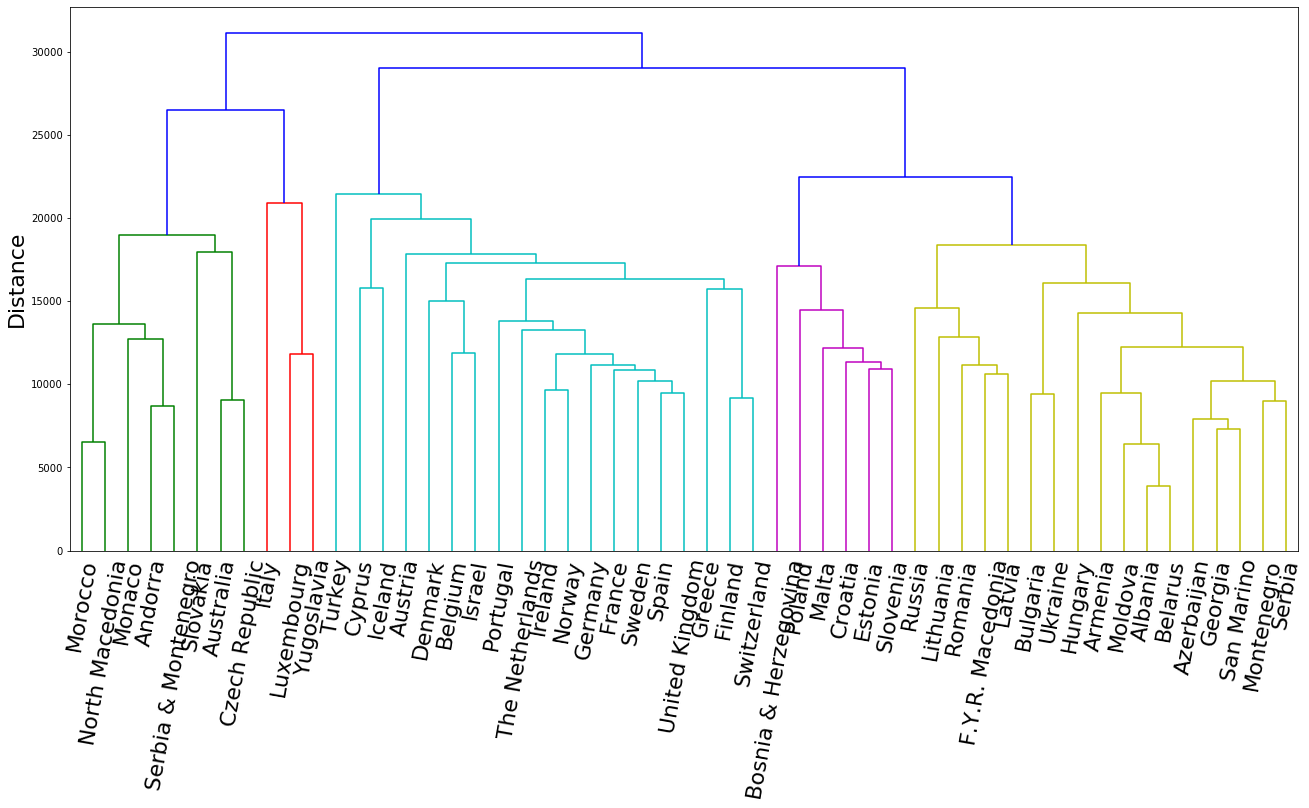

In [216]:
plot_dendrogram(22, 10, 'complete', 'euclidean')